In [2]:
import numpy as np
import pandas as pd
from ast import literal_eval
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
nrc_lexicon = pd.read_csv('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', header=None, names=['word', 'class', 'match'])
# remove non-match
nrc_lexicon = nrc_lexicon[nrc_lexicon['match']!=0]

# remove classes of positive and negative
nrc_lexicon = nrc_lexicon[~nrc_lexicon['class'].isin(['negative','positive'])]

In [4]:
# we now see some words belong to multiple classes.
# we want to get words that only belong to a single class.
class_count = nrc_lexicon.groupby('word').sum()
single_class = class_count[class_count['match']==1].index.tolist()
nrc_lexicon = nrc_lexicon[nrc_lexicon['word'].isin(single_class)]
nrc_lexicon.drop(['match'], inplace=True, axis=1)

In [5]:
emotional_words = nrc_lexicon['word'].to_list()

In [25]:
input_file = open('fitted/em-crawl-300d-2M-subword-20epoch.txt','rb')

word_vectors = {}

while True:   
    line = input_file.readline()
    line = line.decode('gbk', 'ignore').strip()

    if not line: 
        break
        
    tokens = line.split()
    if tokens[0] in emotional_words:
        word_vectors[tokens[0]] = list(map(float, tokens[1:]))

In [28]:
def en_model(word):
    vector = word_vectors.get(word, np.nan)
    return vector

In [29]:
nrc_lexicon

,word,class
19,abacus,trust
89,abbot,trust
152,aberration,disgust
212,abject,disgust
242,abnormal,disgust
...,...,...
140970,wreak,anger
141090,wring,anger
141117,wrinkled,sadness
141263,xenophobia,fear


In [30]:
nrc_lexicon['vector'] = nrc_lexicon['word'].apply(lambda x: en_model(x))

In [31]:
nrc_lexicon.dropna(inplace=True)

In [32]:
nrc_lexicon

,word,class,vector
19,abacus,trust,"[0.078755, 0.050196, -0.013002, 0.087263, 0.05..."
89,abbot,trust,"[0.068244, 0.033849, -0.012172, 0.08703, 0.025..."
152,aberration,disgust,"[-0.04159, 0.05778, 0.047965, -0.065315, 0.024..."
212,abject,disgust,"[-0.047621, 0.03598, 0.062816, -0.044817, 0.06..."
242,abnormal,disgust,"[-0.040274, 0.057738, 0.038788, -0.051792, 0.0..."
...,...,...,...
140970,wreak,anger,"[0.030168, 0.013644, -0.020225, 0.032006, 0.12..."
141090,wring,anger,"[0.058945, 0.011296, -0.014283, 0.089127, 0.05..."
141117,wrinkled,sadness,"[0.009271, 0.10167, 0.021964, 0.021106, 0.0556..."
141263,xenophobia,fear,"[0.009993, 0.053754, 0.056016, -0.05449, 0.070..."


In [33]:
data = nrc_lexicon

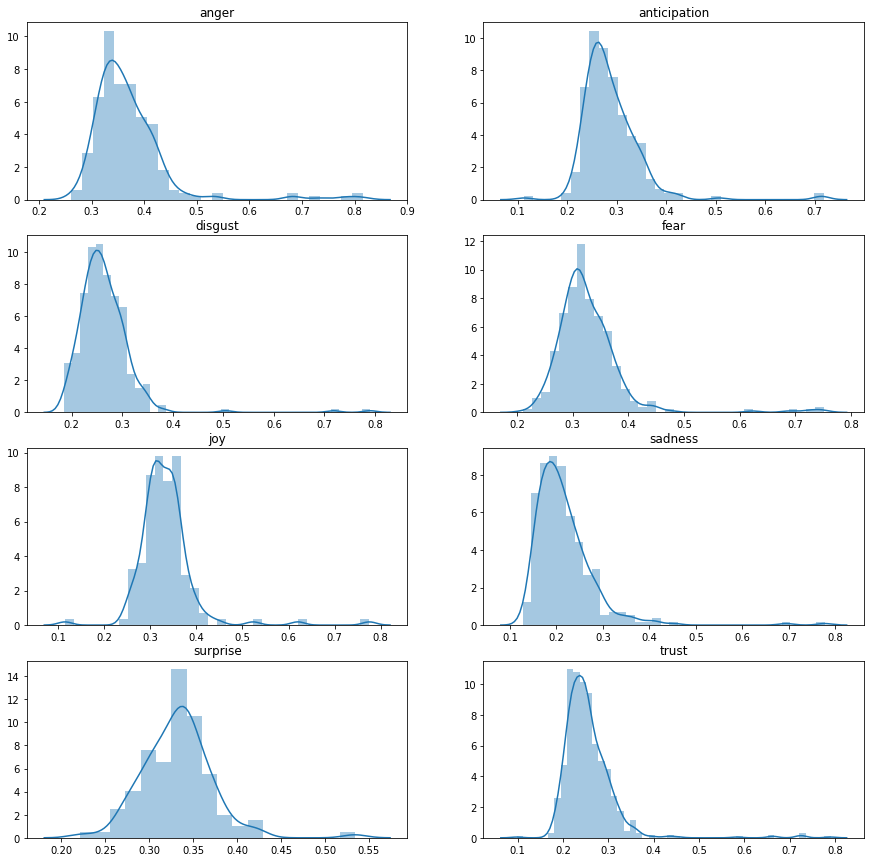

In [34]:
class_list = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']


centroids = []
f, axes = plt.subplots(4, 2, figsize=(15,15))
for i, cl in enumerate(class_list):
    dist = []
    words_vector = data[data['class']==cl]
    vector_list = words_vector['vector'].to_list()
    centroid = np.mean(vector_list, axis=0)
    centroids.append(centroid)
    
    for vector in vector_list:
        distance = np.linalg.norm(vector - centroid)
        dist.append(distance)
    
    
    sns.distplot(dist, ax=axes[int(i/2), int(i%2)])
    axes[int(i/2), int(i%2)].set_title(cl)
    
plt.show()

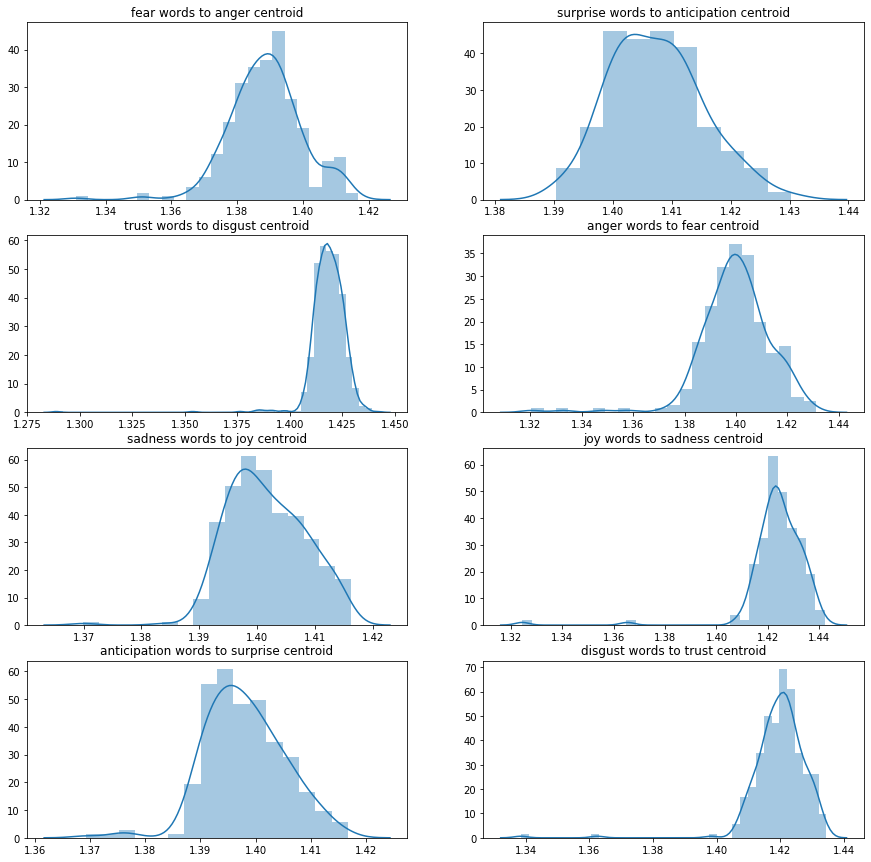

In [35]:
compared_class_list = ['fear', 'surprise', 'trust', 'anger', 'sadness', 'joy', 'anticipation', 'disgust']

f, axes = plt.subplots(4, 2, figsize=(15,15))
for i, cl in enumerate(compared_class_list):
    dist = []
    words_vector = data[data['class']==cl]
    vector_list = words_vector['vector'].to_list()
    centroid = centroids[i]
    
    for vector in vector_list:
        distance = np.linalg.norm(vector - centroid)
        dist.append(distance)
    
    
    sns.distplot(dist, ax=axes[int(i/2), int(i%2)])
    axes[int(i/2), int(i%2)].set_title(f'{cl} words to {class_list[i]} centroid')
    
plt.show()